In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
model6 = pd.read_csv('data/model6.csv', index_col = 0)

model6.loc[model6.results < 0] = 0

final_no_out = model6.loc[model6['results'] < 0.99]
final_no_out = final_no_out.loc[final_no_out['results'] > 0.01]


(0.0, 1)

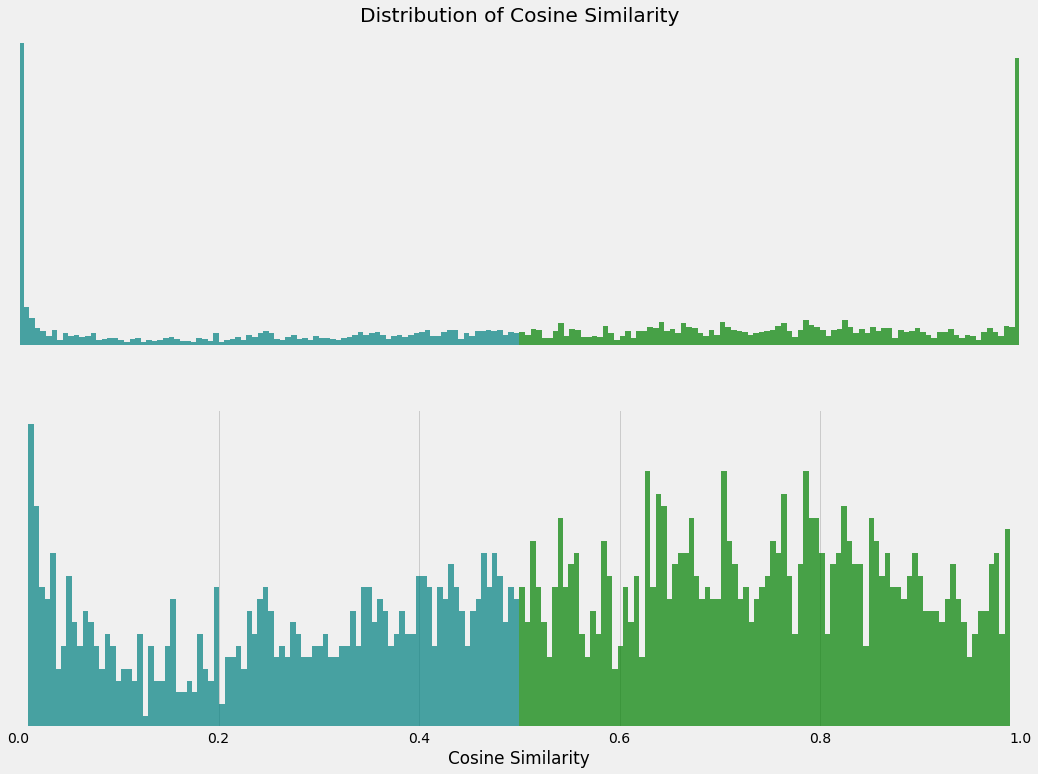

In [6]:
fig, axs = plt.subplots(2,1, figsize = (16,12),sharex=True)
axs[0].set_title("Distribution of Cosine Similarity")
axs[0].hist(model6.loc[model6['results'] < 0.500]['results'], bins = 90, color='teal', alpha = 0.7)
axs[0].hist(model6.loc[model6['results'] > 0.500]['results'] , bins = 90, color='green', alpha = 0.7)
axs[1].hist(final_no_out.loc[final_no_out['results'] < 0.5]['results'], bins = 90, color='teal', alpha = 0.7)
axs[1].hist(final_no_out.loc[final_no_out['results'] > 0.5]['results'] , bins = 90, color='green', alpha = 0.7)

axs[0].get_yaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
axs[0].get_xaxis().set_visible(False)
#axs[1].get_xaxis().set_visible(False)
axs[1].set_xlabel("Cosine Similarity")

axs[0].set_xlim(model6.loc[model6['results'] < 0.500]['results'].min(),1)

#plt.savefig('CosineSimilarity.png')
